Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '60d31a0ae7c20e0e57f9c6b8'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 71905
before = 1
after = 4

In [9]:
anom

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
0,2021-06-23 14:01:31,60d31a0ae7c20e0e57f9c6b8,"[234.80425,233.482307692308,234.2905]","[5.9725,6.695,6.1875]","[652.709,962.99675,731.39625]","[23872.171775,31264.464545,27225.3608475]",[],[],[],2347.102,...,[],[],2401.68,82362.0359,\N,\N,\N,"[-10,-9.7,-10.9]","[0,-119.2,119.9]",50.04
1,2021-06-23 14:03:31,60d31a0ae7c20e0e57f9c6b8,"[234.158717948718,233.682051282051,234.3792307...","[5.9538461538461505,6.73157894736842,6.2205128...","[644.139210526316,967.354210526316,733.0123684...","[23872.193474359,31264.4970871795,27225.3852]",[],[],[],2344.505789,...,[],[],2398.63,82362.1135,\N,\N,\N,"[-10.2,-10,-11.7]","[0,-119.3,120]",49.99
2,2021-06-23 14:05:31,60d31a0ae7c20e0e57f9c6b8,"[234.397435897436,233.990256410256,234.8574358...","[6.04615384615384,6.63333333333333,6.115384615...","[657.30625,957.381,729.69575]","[23872.2152589744,31264.5292615385,27225.409625]",[],[],[],2344.383,...,[],[],2384.84,82362.192,\N,\N,\N,"[-10.5,-10.9,-10.6]","[0,-119.4,120]",50.0
3,2021-06-23 14:07:31,60d31a0ae7c20e0e57f9c6b8,"[234.476578947368,233.620256410256,233.4446153...","[6.1974358974359,6.63846153846154,6.1564102564...","[674.248974358974,949.05358974359,728.85315789...","[23872.237251282,31264.5607333333,27225.434038...",[],[],[],2352.155722,...,[],[],2403.82,82362.2705,\N,\N,\N,"[-11.1,-11.4,-9.8]","[0,-119.3,120.1]",49.99
4,2021-06-23 14:09:31,60d31a0ae7c20e0e57f9c6b8,"[234.981282051282,234.234736842105,234.3352631...","[6.1,6.62894736842105,6.14358974358974]","[664.180769230769,950.914871794872,728.09]","[23872.2595717949,31264.5922589744,27225.45837...",[],[],[],2343.185641,...,[],[],2383.2,82362.3482,\N,\N,\N,"[-9.9,-11,-10.1]","[0,-119.4,120.1]",50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180269,2022-02-28 23:51:32,60d31a0ae7c20e0e57f9c6b8,"[229.74,229.32,230.29]","[0.2,0.3,0.3]","[10.76,5.11,62.55]","[27264.1302,35180.9461,31163.6597]","[123.5208,3.5778,0.1625]","[34591.9355,42782.7115,36504.3154]","[6.1713,0.2185,0.0182]",78.42,...,"[34591.9355,42782.7115,36504.3154]","[6.1713,0.2185,0.0182]",79.84,93608.736,127.26109999999998,113878.96239999999,6.4079999999999995,"[-75.9,-84.8,-34.1]","[0,-119.8,119.9]",49.96
180270,2022-02-28 23:53:32,60d31a0ae7c20e0e57f9c6b8,"[229.6,228.71,230.5]","[0.2,0.3,0.3]","[10.6,5.33,62.68]","[27264.1305,35180.9463,31163.6618]","[123.5208,3.5778,0.1625]","[34591.9372,42782.7138,36504.3178]","[6.1713,0.2185,0.0182]",78.61,...,"[34591.9372,42782.7138,36504.3178]","[6.1713,0.2185,0.0182]",79.98,93608.7386,127.26109999999998,113878.9688,6.4079999999999995,"[-76.3,-84.7,-33.8]","[0,-120,119.9]",49.97
180271,2022-02-28 23:55:32,60d31a0ae7c20e0e57f9c6b8,"[228.91,228.7,229.78]","[0.2,0.3,0.3]","[10.7,5.16,62.4]","[27264.1309,35180.9464,31163.6638]","[123.5208,3.5778,0.1625]","[34591.9389,42782.7162,36504.3203]","[6.1713,0.2185,0.0182]",78.26,...,"[34591.9389,42782.7162,36504.3203]","[6.1713,0.2185,0.0182]",79.66,93608.7411,127.26109999999998,113878.9754,6.4079999999999995,"[-76.4,-85.4,-33.7]","[0,-119.9,120]",49.96
180272,2022-02-28 23:57:32,60d31a0ae7c20e0e57f9c6b8,"[229.54,229.6,230.29]","[0.2,0.3,0.3]","[10.8,5.4,62.73]","[27264.1313,35180.9466,31163.6659]","[123.5208,3.5778,0.1625]","[34591.9406,42782.7185,36504.3227]","[6.1713,0.2185,0.0182]",78.93,...,"[34591.9406,42782.7185,36504.3227]","[6.1713,0.2185,0.0182]",79.05,93608.7438,127.26109999999998,113878.98180000001,6.4079999999999995,"[-76.3,-85.3,-34]","[0,-119.8,120]",50.0


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

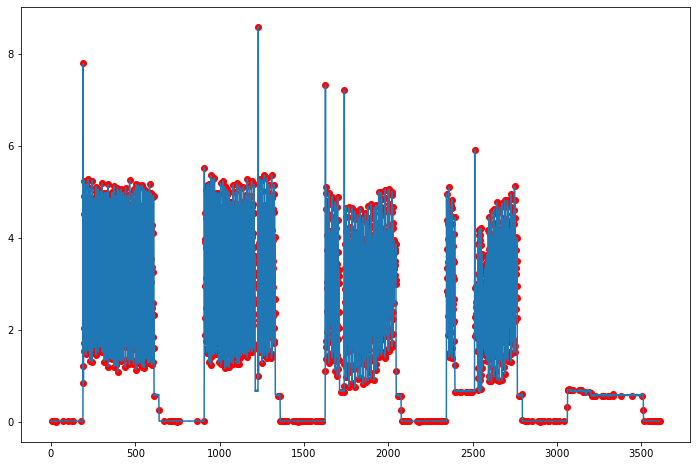

In [13]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = IsolationForest(random_state=0) 
model.fit(df)
preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3064 3512 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


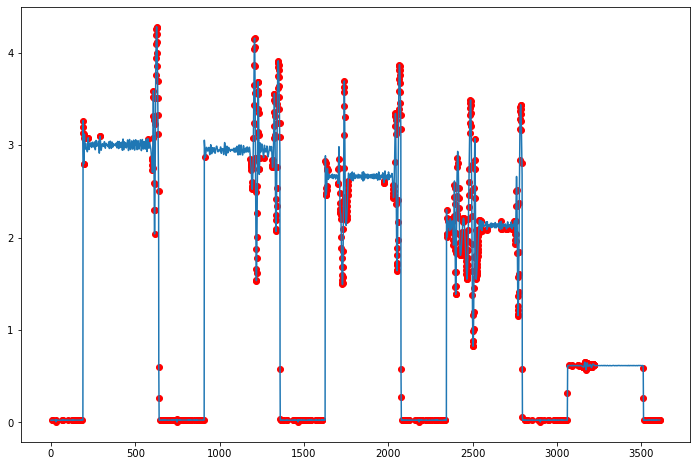

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

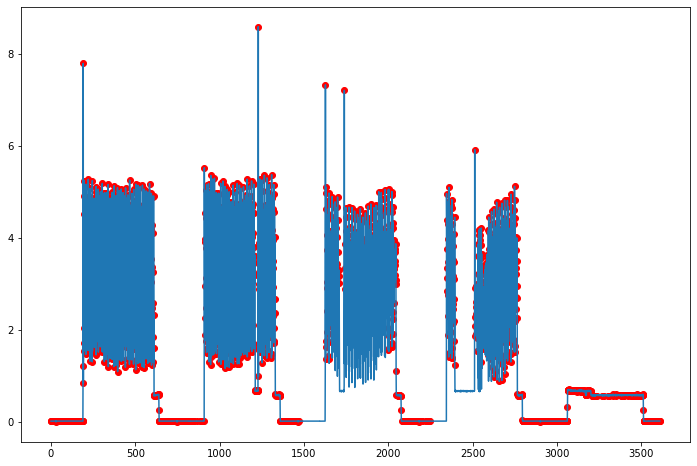

In [15]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3064 3512 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


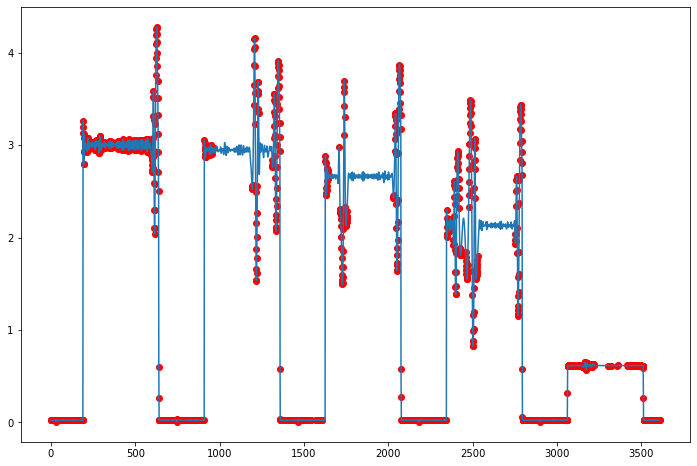

In [16]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

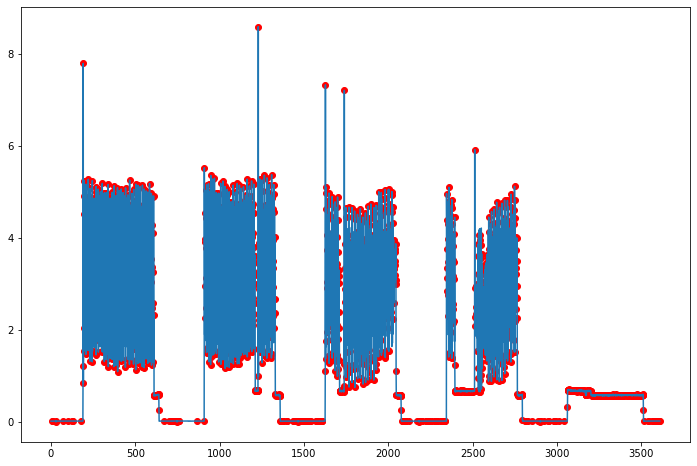

In [17]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

729
0 729
191 640 0
729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3064 3512 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


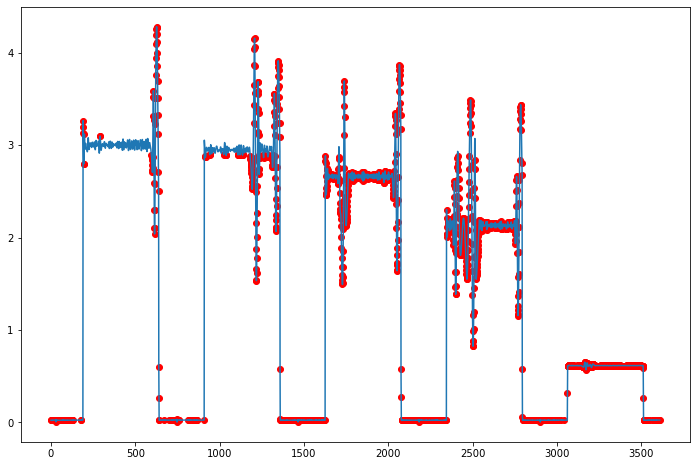

In [18]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, без EMD 
Трейн на норм

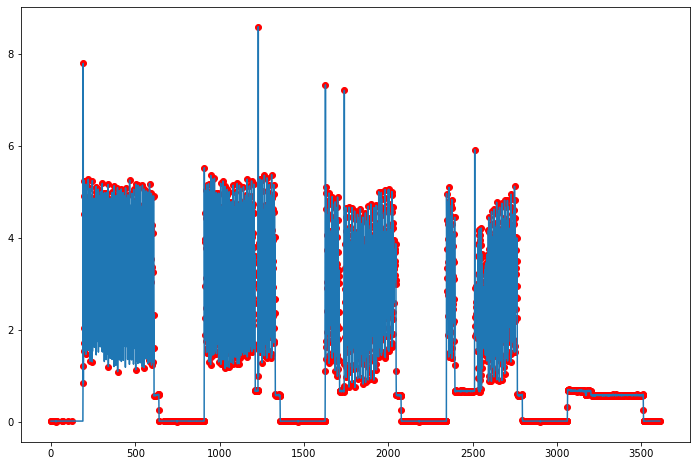

In [19]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на норм

729
0 729
191 640 0
729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884
2346 2795 3
3601
2884 3601


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


3064 3512 4


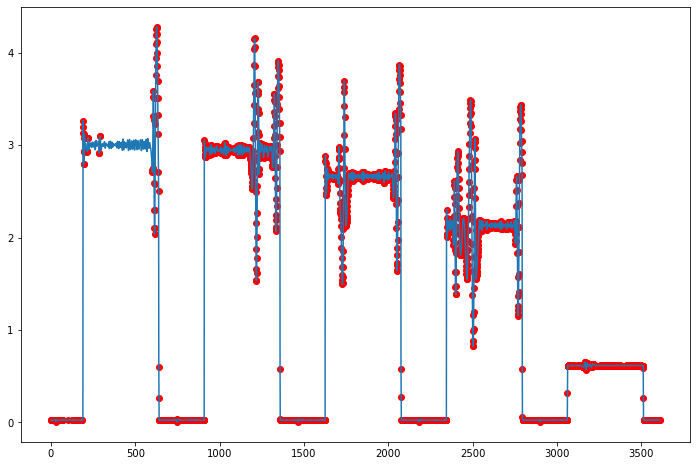

In [20]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3064 3512 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


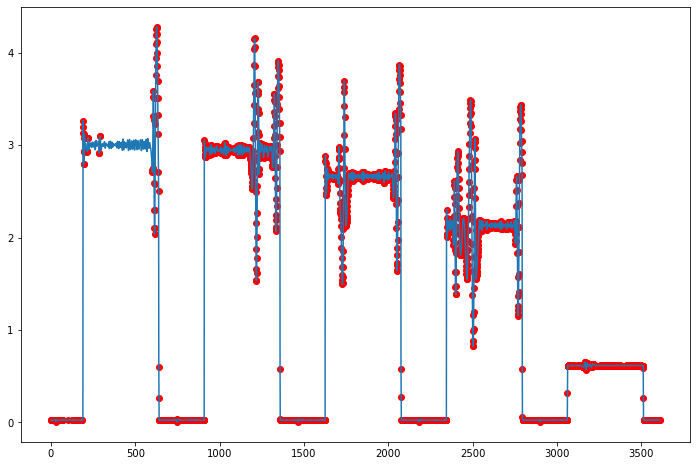

In [21]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4


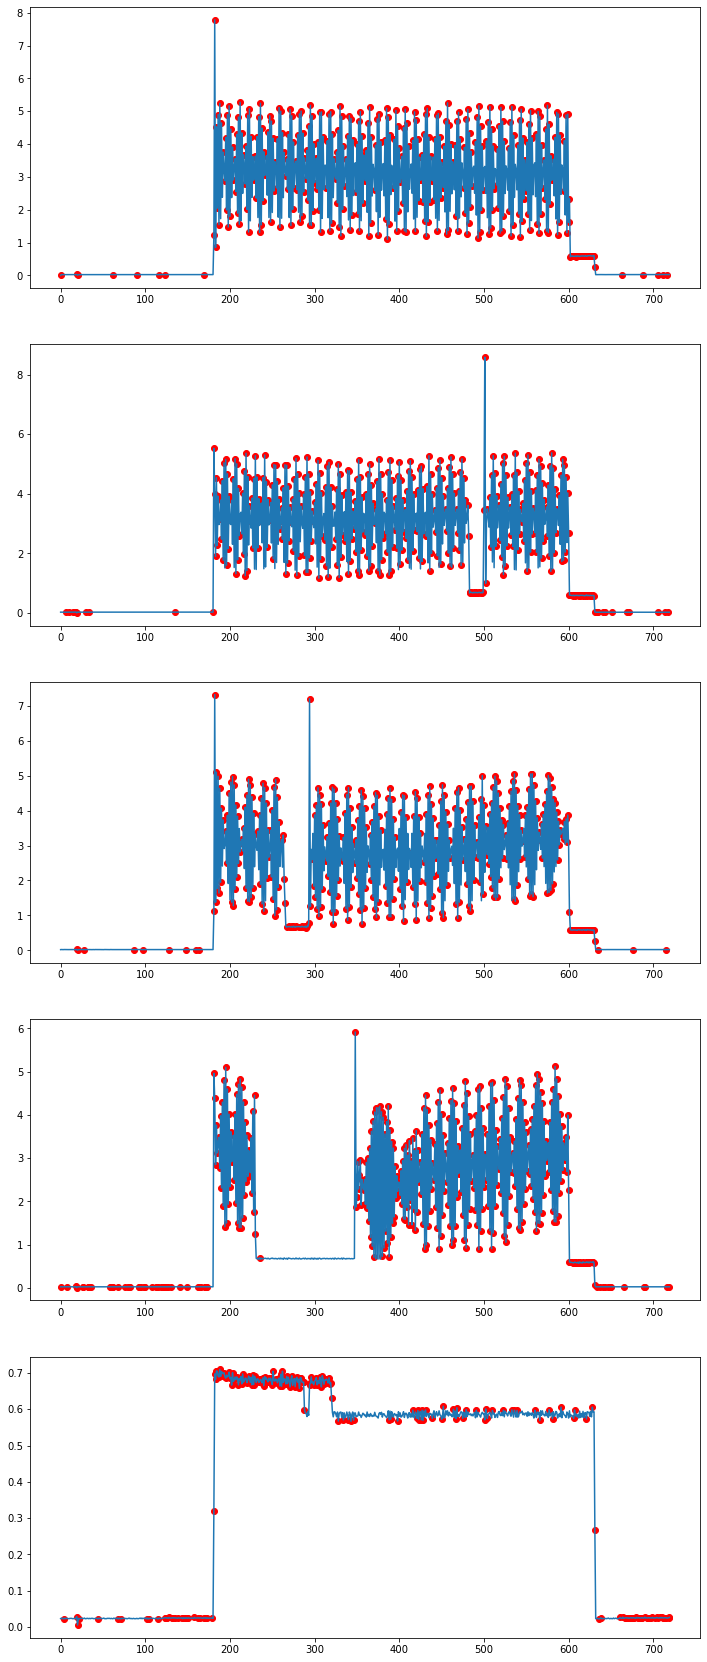

In [22]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3064 3512 4
[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4
(5, 720)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


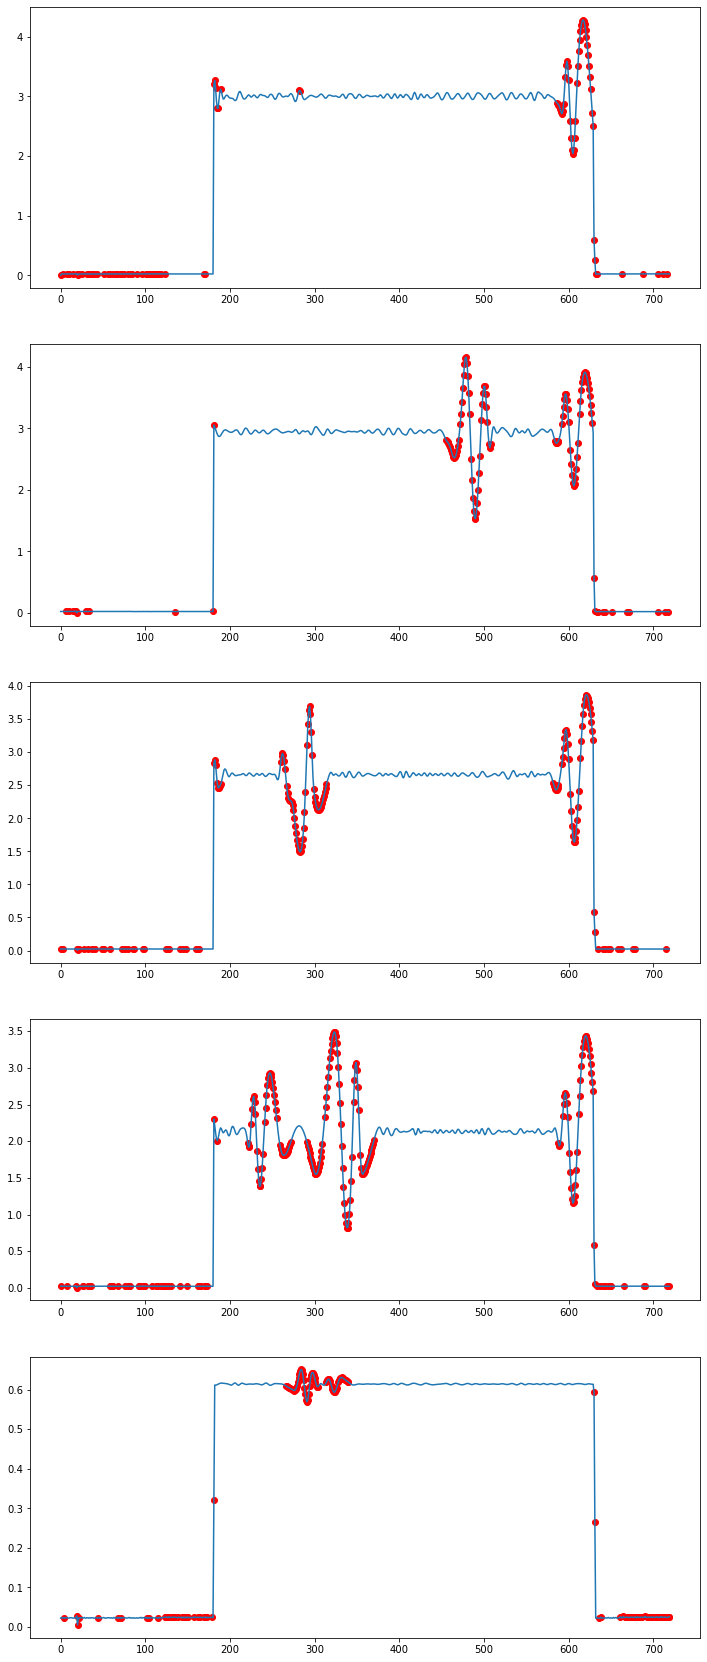

In [23]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(5, 720, 5)


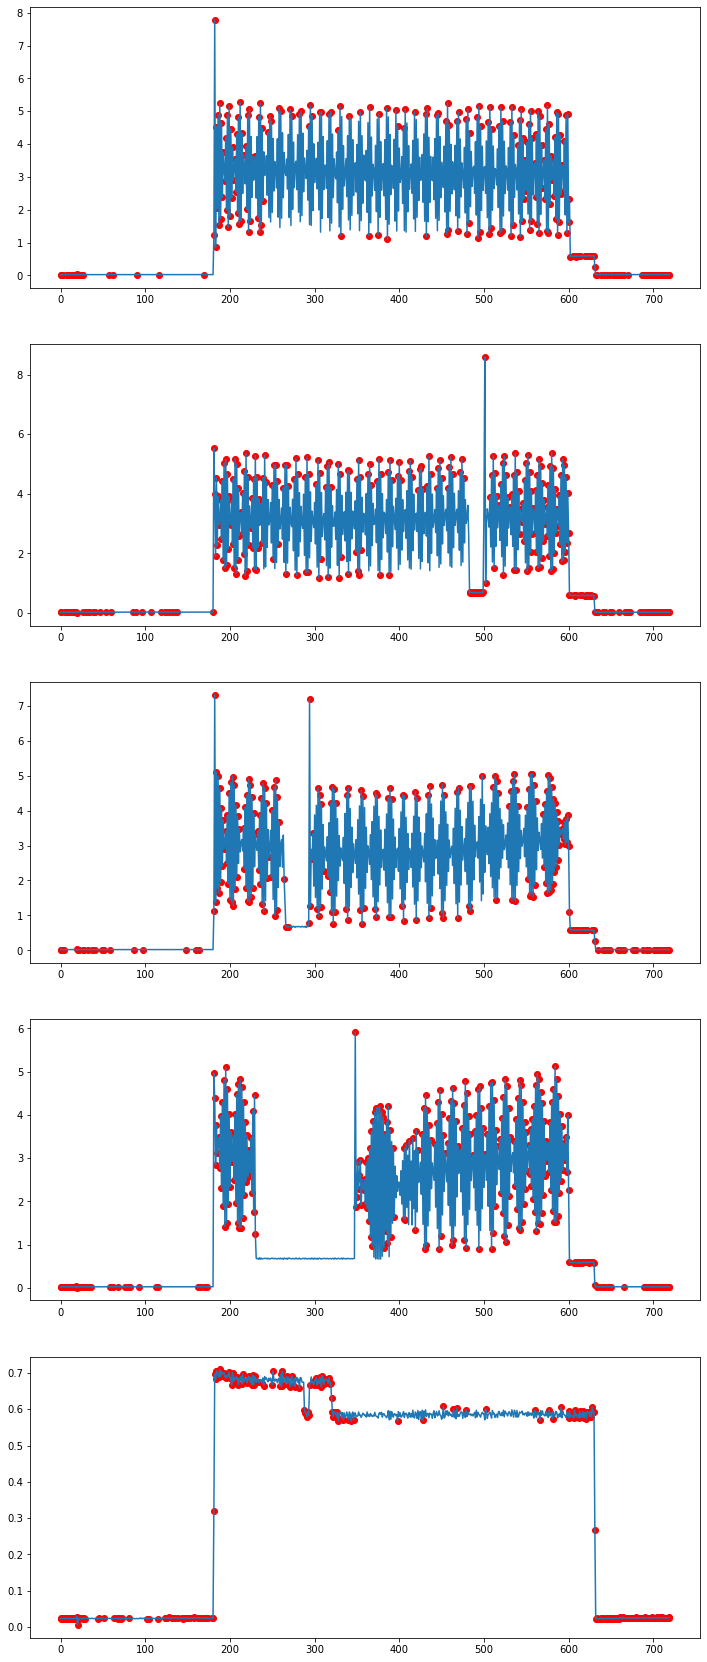

In [24]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3064 3512 4
(5, 720, 5)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


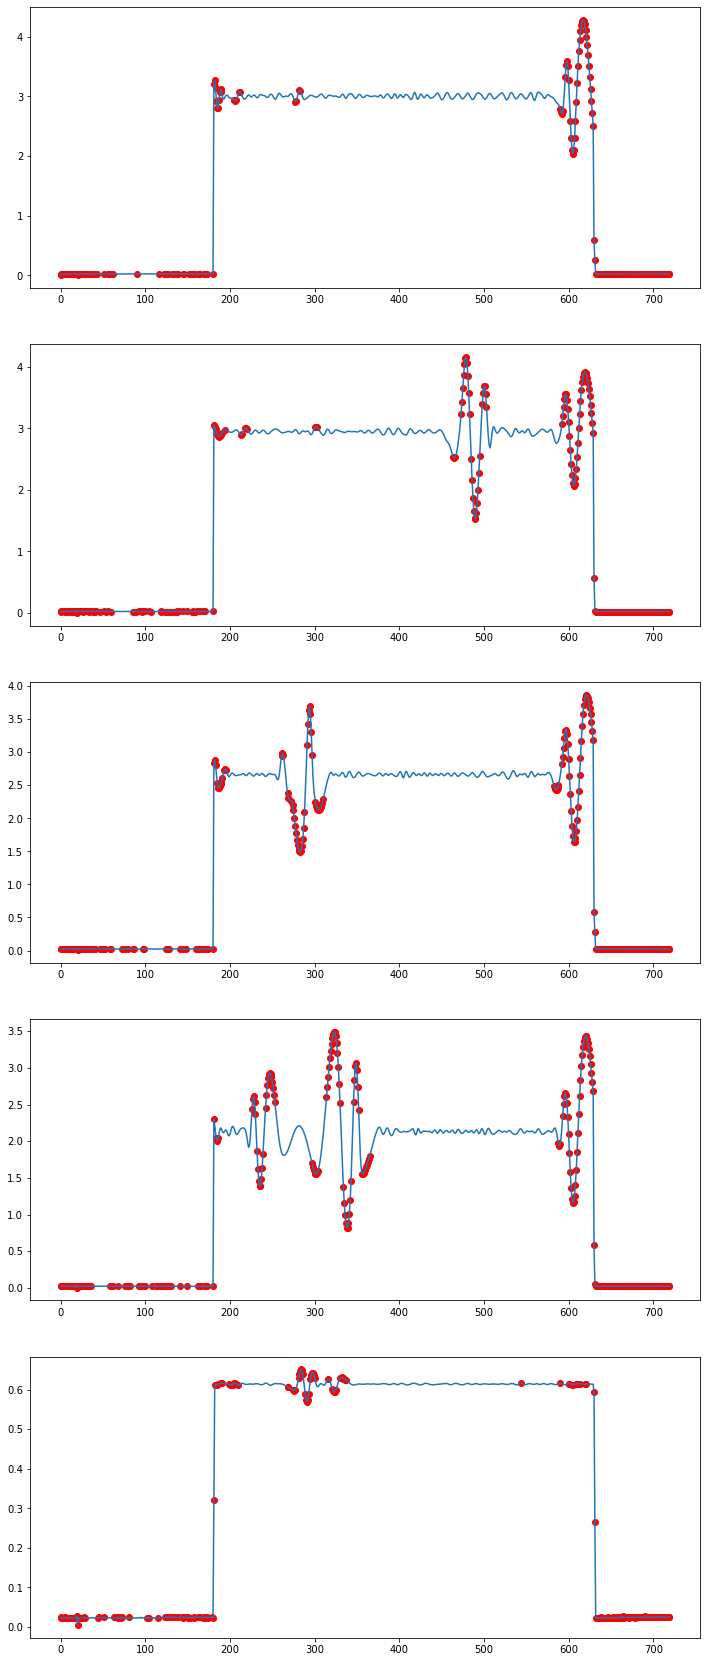

In [25]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, одна размерность, без EMD 
Трейн на норм

[ 12 729]
12 729 0
(1, 720)
[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4


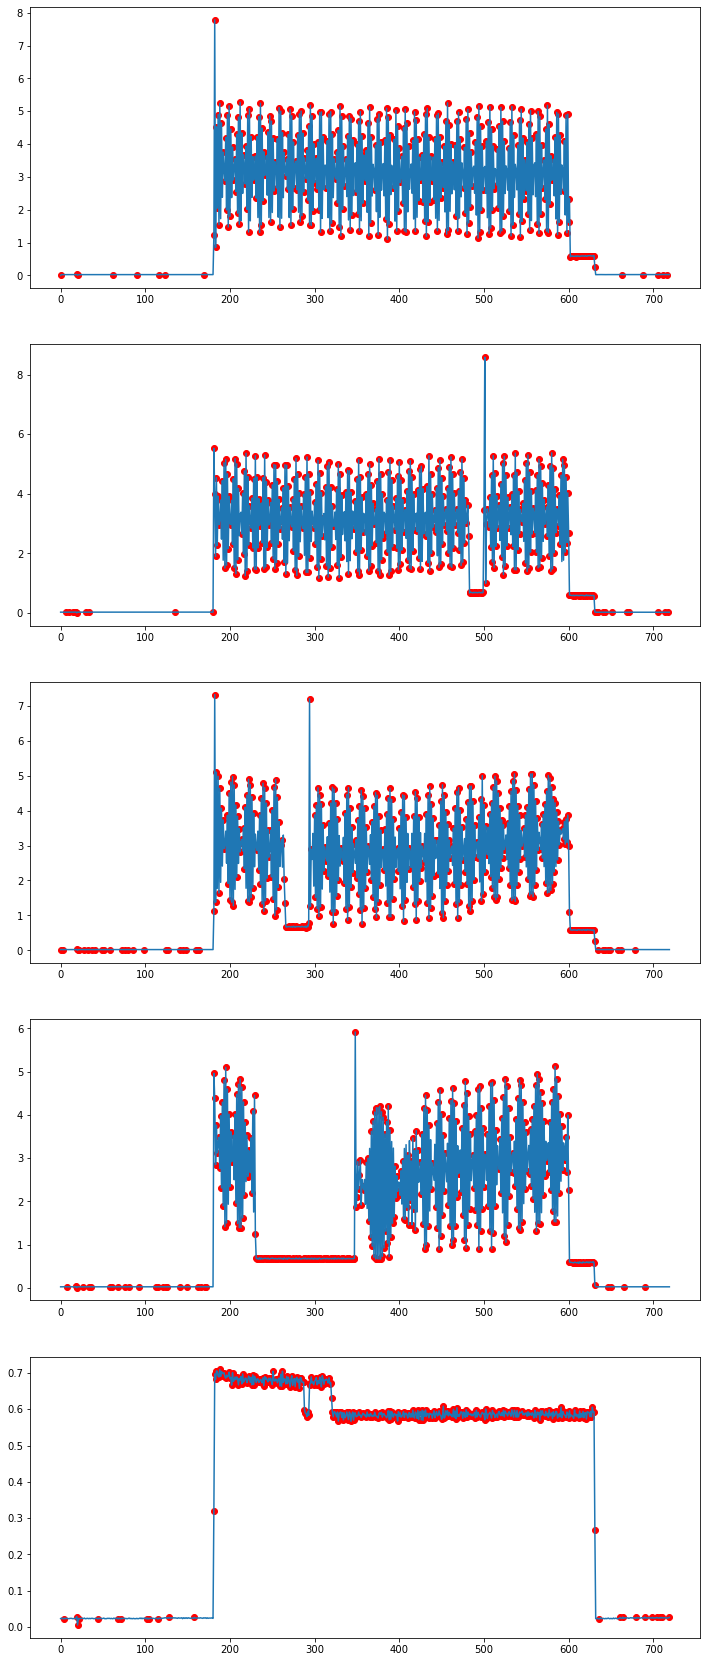

In [26]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на норм

729
0 729
191 640 0
[ 12 729]
12 729 0
(1, 720)
729
0 729
191 640 0
[ 12 729]
12 729 0


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


TypeError: 'AxesSubplot' object is not subscriptable

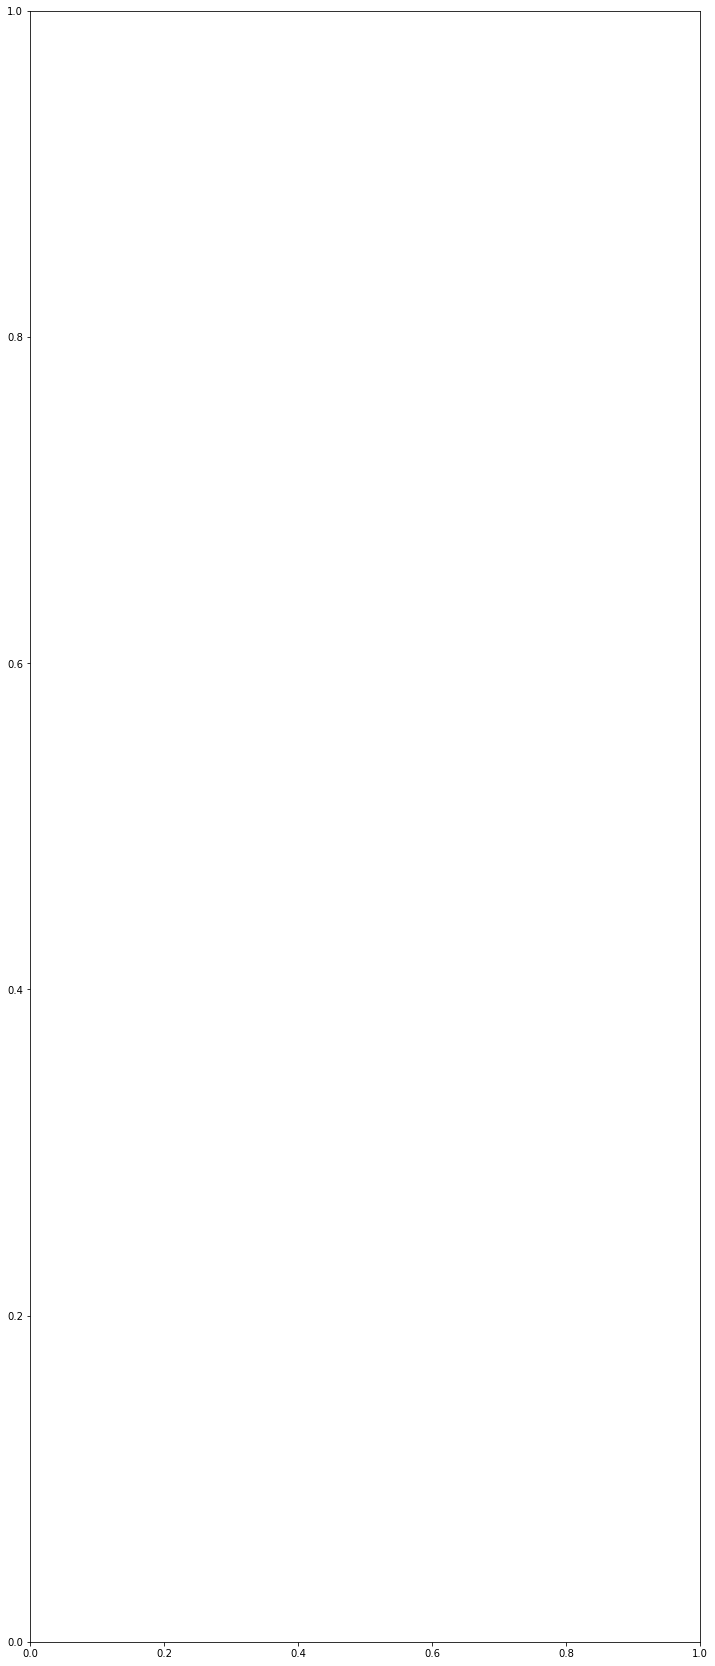

In [27]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4


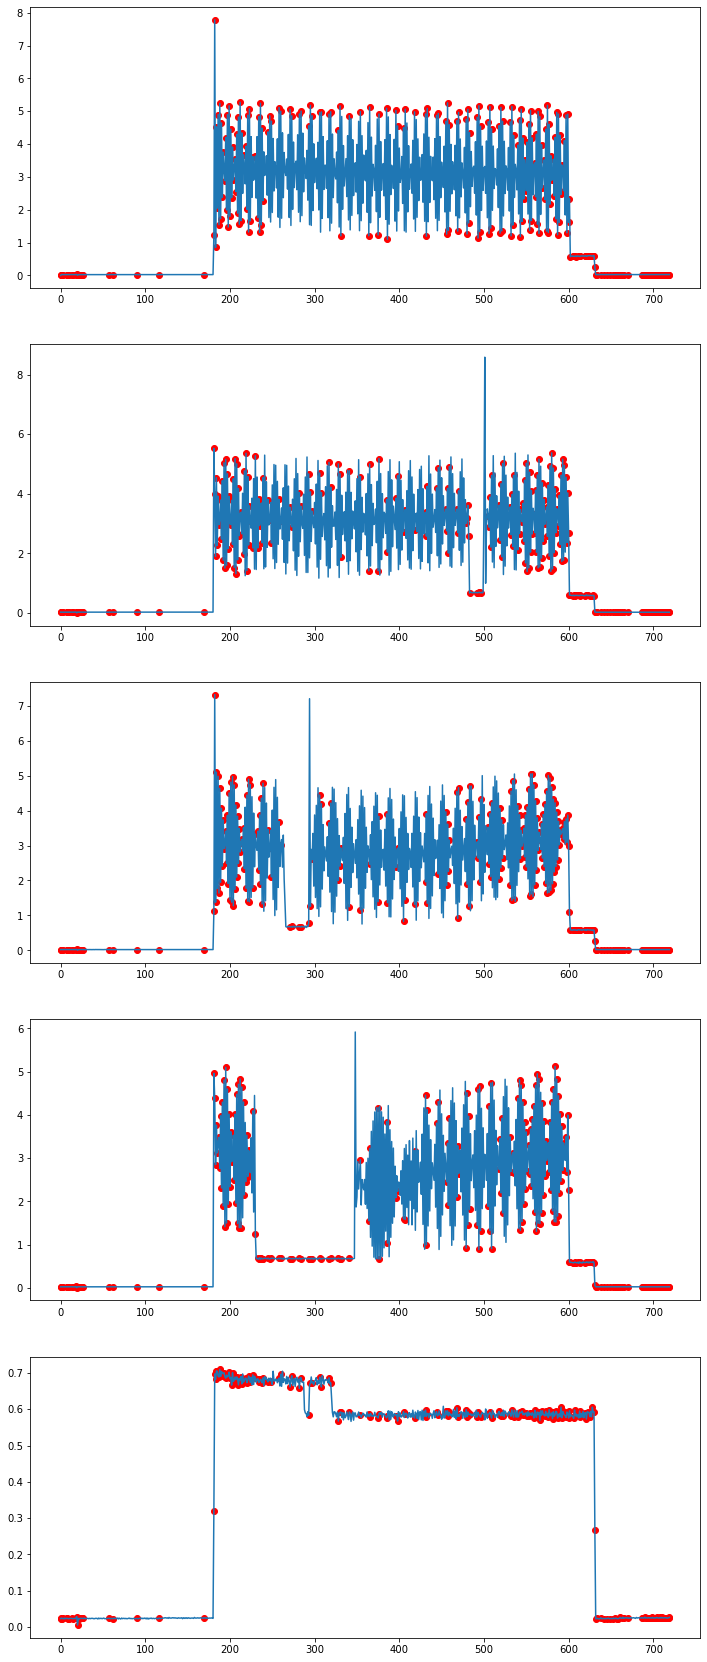

In [28]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на норм

729
0 729
191 640 0
729
0 729
191 640 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2076 2
2884
2165 2884


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


2346 2795 3
3601
2884 3601
3064 3512 4
[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4


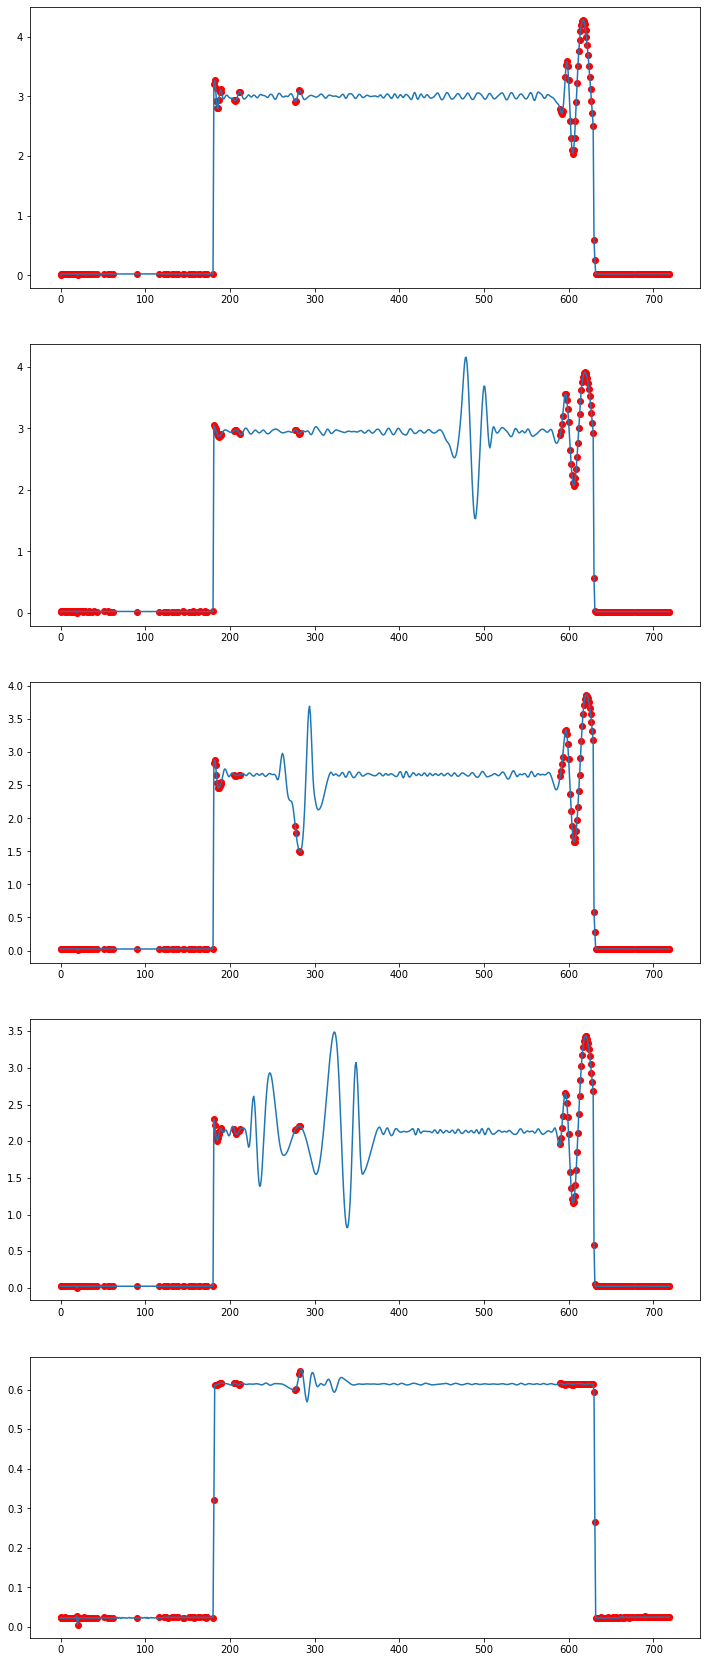

In [29]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

In [ ]:
### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 2)
Трейн на норм

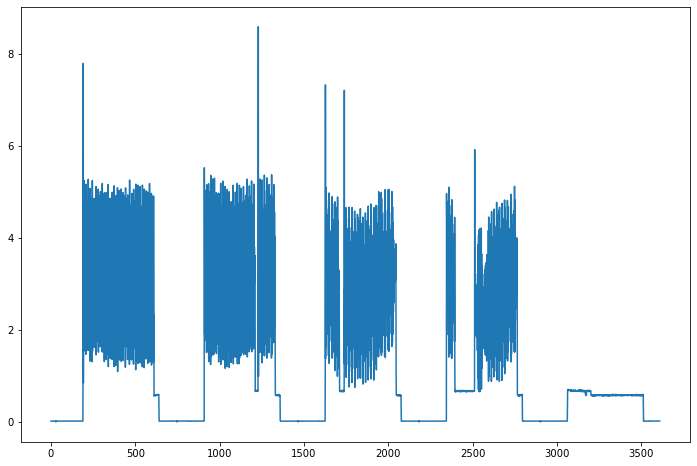

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 5)
Трейн на норм

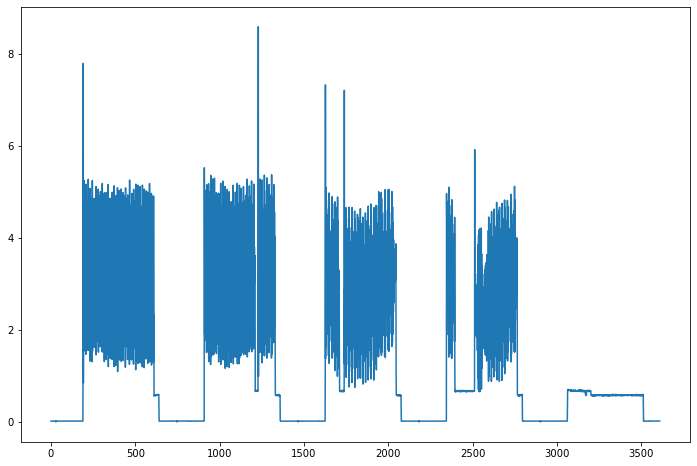

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 15)
Трейн на норм

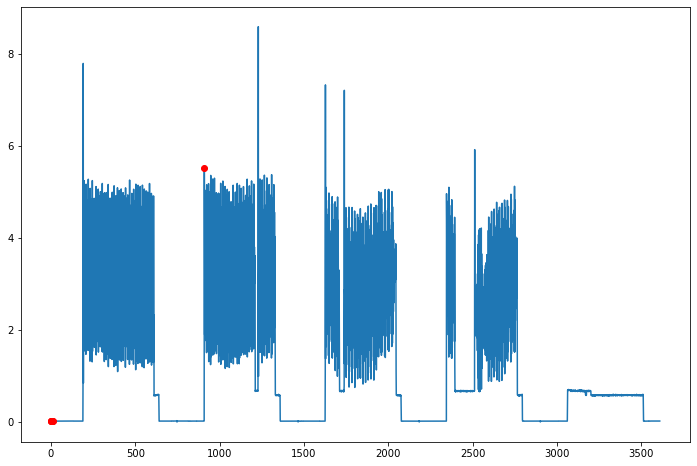

In [11]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, с EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


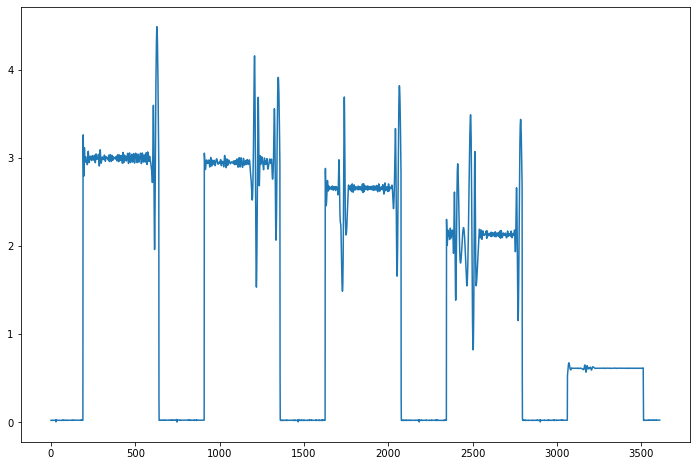

In [4]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, с EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


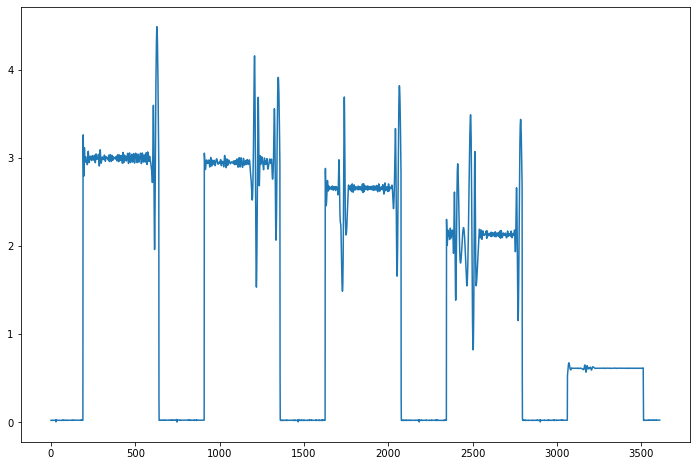

In [5]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, с EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


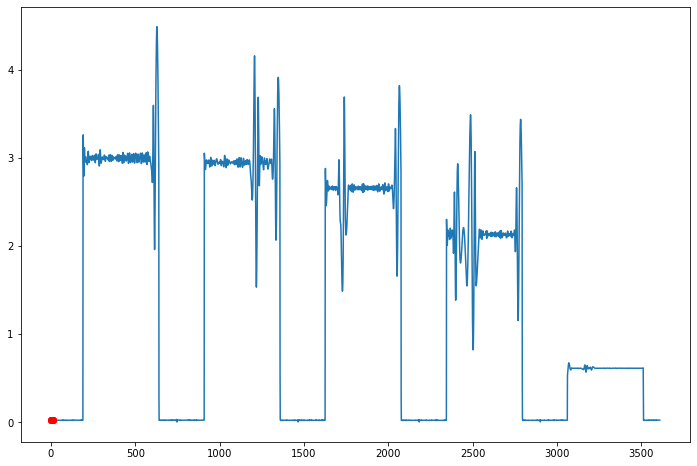

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

[ 12 729]
SMALL
731
HIII
720
[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths


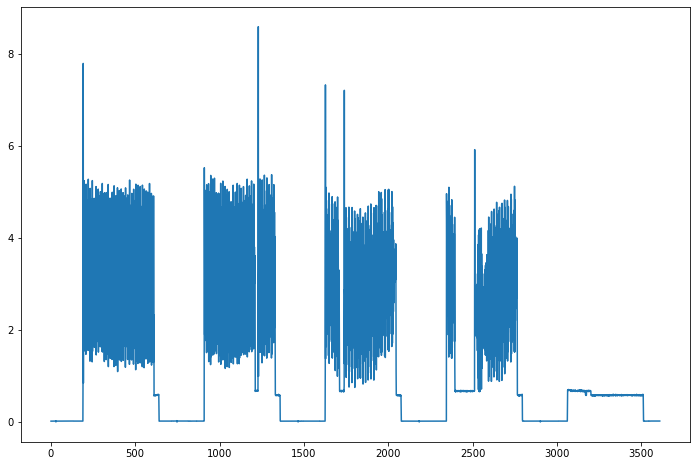

In [4]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

[ 12 729]
SMALL
731
HIII
720
[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths


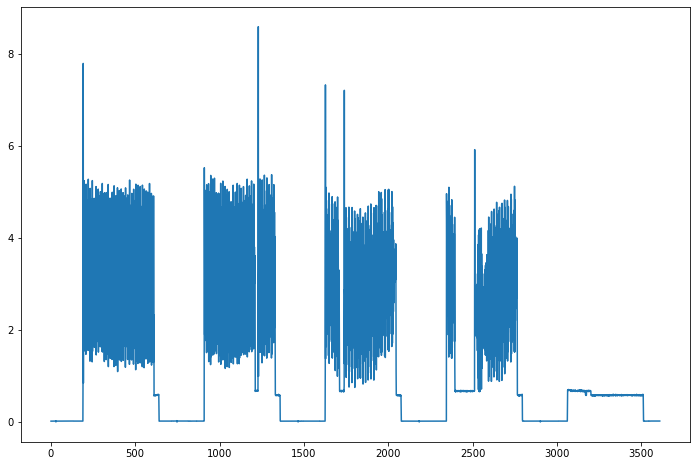

In [5]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

[ 12 729]
SMALL
731
HIII
720
[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths


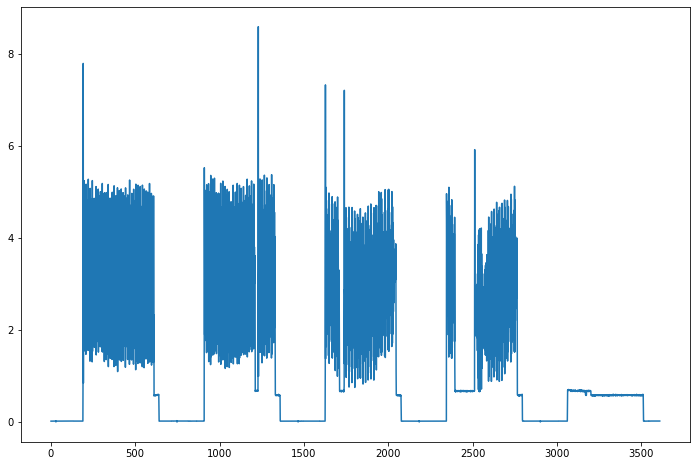

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[ 12 729]
SMALL
731
HIII
720
[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


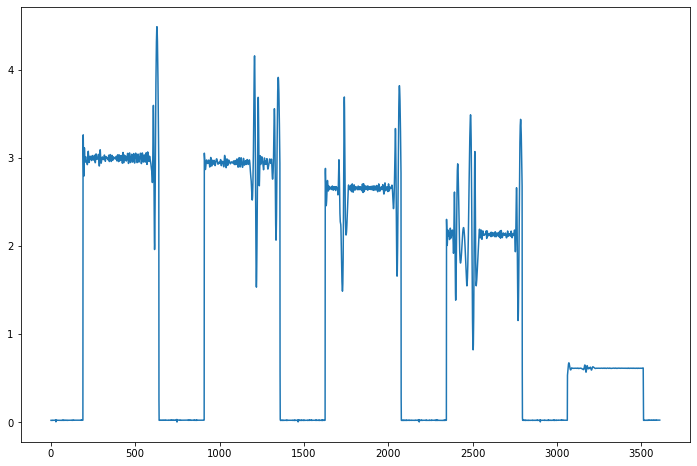

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[ 12 729]
SMALL
731
HIII
720
[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


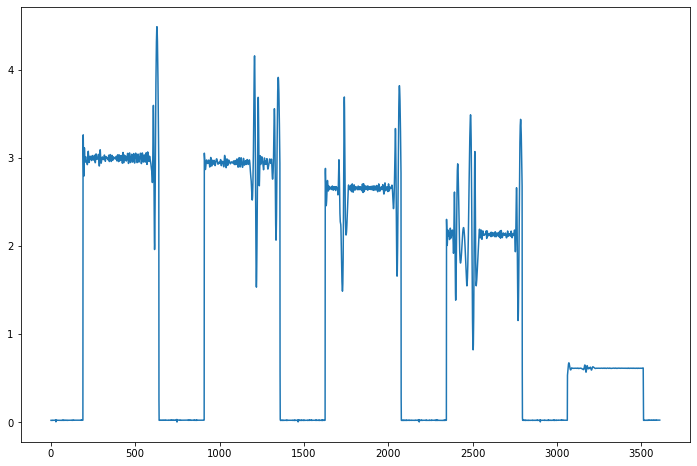

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[ 12 729]
SMALL
731
HIII
720
[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


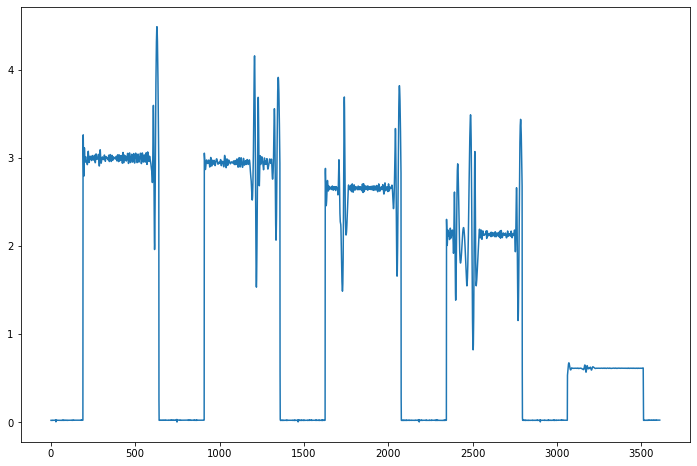

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')